The data used in the ML exercise detailed here comes from [here](https://www.kaggle.com/c/santander-customer-transaction-prediction).

In [1]:
from fastai import *
from fastai.tabular import *
from fastai.basic_data import DataBunch

In [2]:
datapath = pathlib.Path('/accounts/ekarakoy/DATA/Kaggle/santander/')

In [3]:
df = pd.read_csv(datapath/'train.csv')

In [4]:
df_summary = df.describe()
df_summary

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [5]:
test_df = pd.read_csv(datapath/'test.csv').set_index('ID_code')
test_df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


### Normalization
Here rather than using FASTAI stock normalization routine, I do it here manually for greater control

In [6]:
features = test_df.columns.to_list()

In [7]:
dmean, dmin, dmax, = df_summary.loc['mean'], df_summary.loc['min'], df_summary.loc['max']
drange = dmax - dmin
dstd = df_summary.loc['std']

In [8]:
df.loc[:, features] = (df[features] - dmin[features]) / drange[features]
#df = (df[features].copy() - dmean[features]) / dstd[features]

In [9]:
test_df.loc[:, features] = (test_df[features] - dmin[features]\
                           ) / drange[features]

### Feature engineering

Nothing special, just polynomial and statistical moments

In [10]:
def augment_df(df):
    
    for feature in features:
        df[f'sq_{feature}'] = df[feature]**2
        df[f'repo_{feature}'] = df[feature].apply(lambda x: 0 if x == 0
                                                 else 1 / x)
        df[f'repo_sq_{feature}'] = df[f'repo_{feature}'] ** 2
        df[f'cube_{feature}'] = df[feature]**3
    df['min'] = df[features].min(axis=1)
    df['max'] = df[features].max(axis=1)
    df['sum'] = df[features].sum(axis=1)
    df['median'] = df[features].median(axis=1)
    df['std'] = df[features].std(axis=1)
    df['var'] = df[features].var(axis=1)
    df['abs_sum'] = df[features].abs().sum(axis=1)
    df['abs_mean'] = df[features].abs().mean(axis=1)
    df['abs_median'] = df[features].abs().median(axis=1)
    df['abs_std'] = df[features].abs().std(axis=1)
    df['skew'] = df[features].skew(axis=1)
    df['kurt'] = df[features].kurt(axis=1)
    df['sq_kurt'] = df[[f'sq_{feature}' 
                        for feature in features]].kurt(axis=1)

In [11]:
augment_df(df)

In [12]:
augment_df(test_df)

In [13]:
features = list(test_df.columns)[:-12]
stats_features = list(test_df.columns)[-12:]
num_features = len(features)
num_features

1001

In [14]:
import seaborn as sns

In [15]:
def view_dist(df, columns, row=10, cols=10):
    f, axes = plt.subplots(10, 10, figsize=(30, 30))
    axes = axes.flatten()
    for col, ax in zip (columns, axes):
        sns.kdeplot(df.loc[df.target==0, col], ax=ax, color='r', label='0')
        sns.kdeplot(df.loc[df.target==1, col], ax=ax, color='b', label='1')
        ax.legend()
        ax.set_title(f'{col}')
    plt.show()

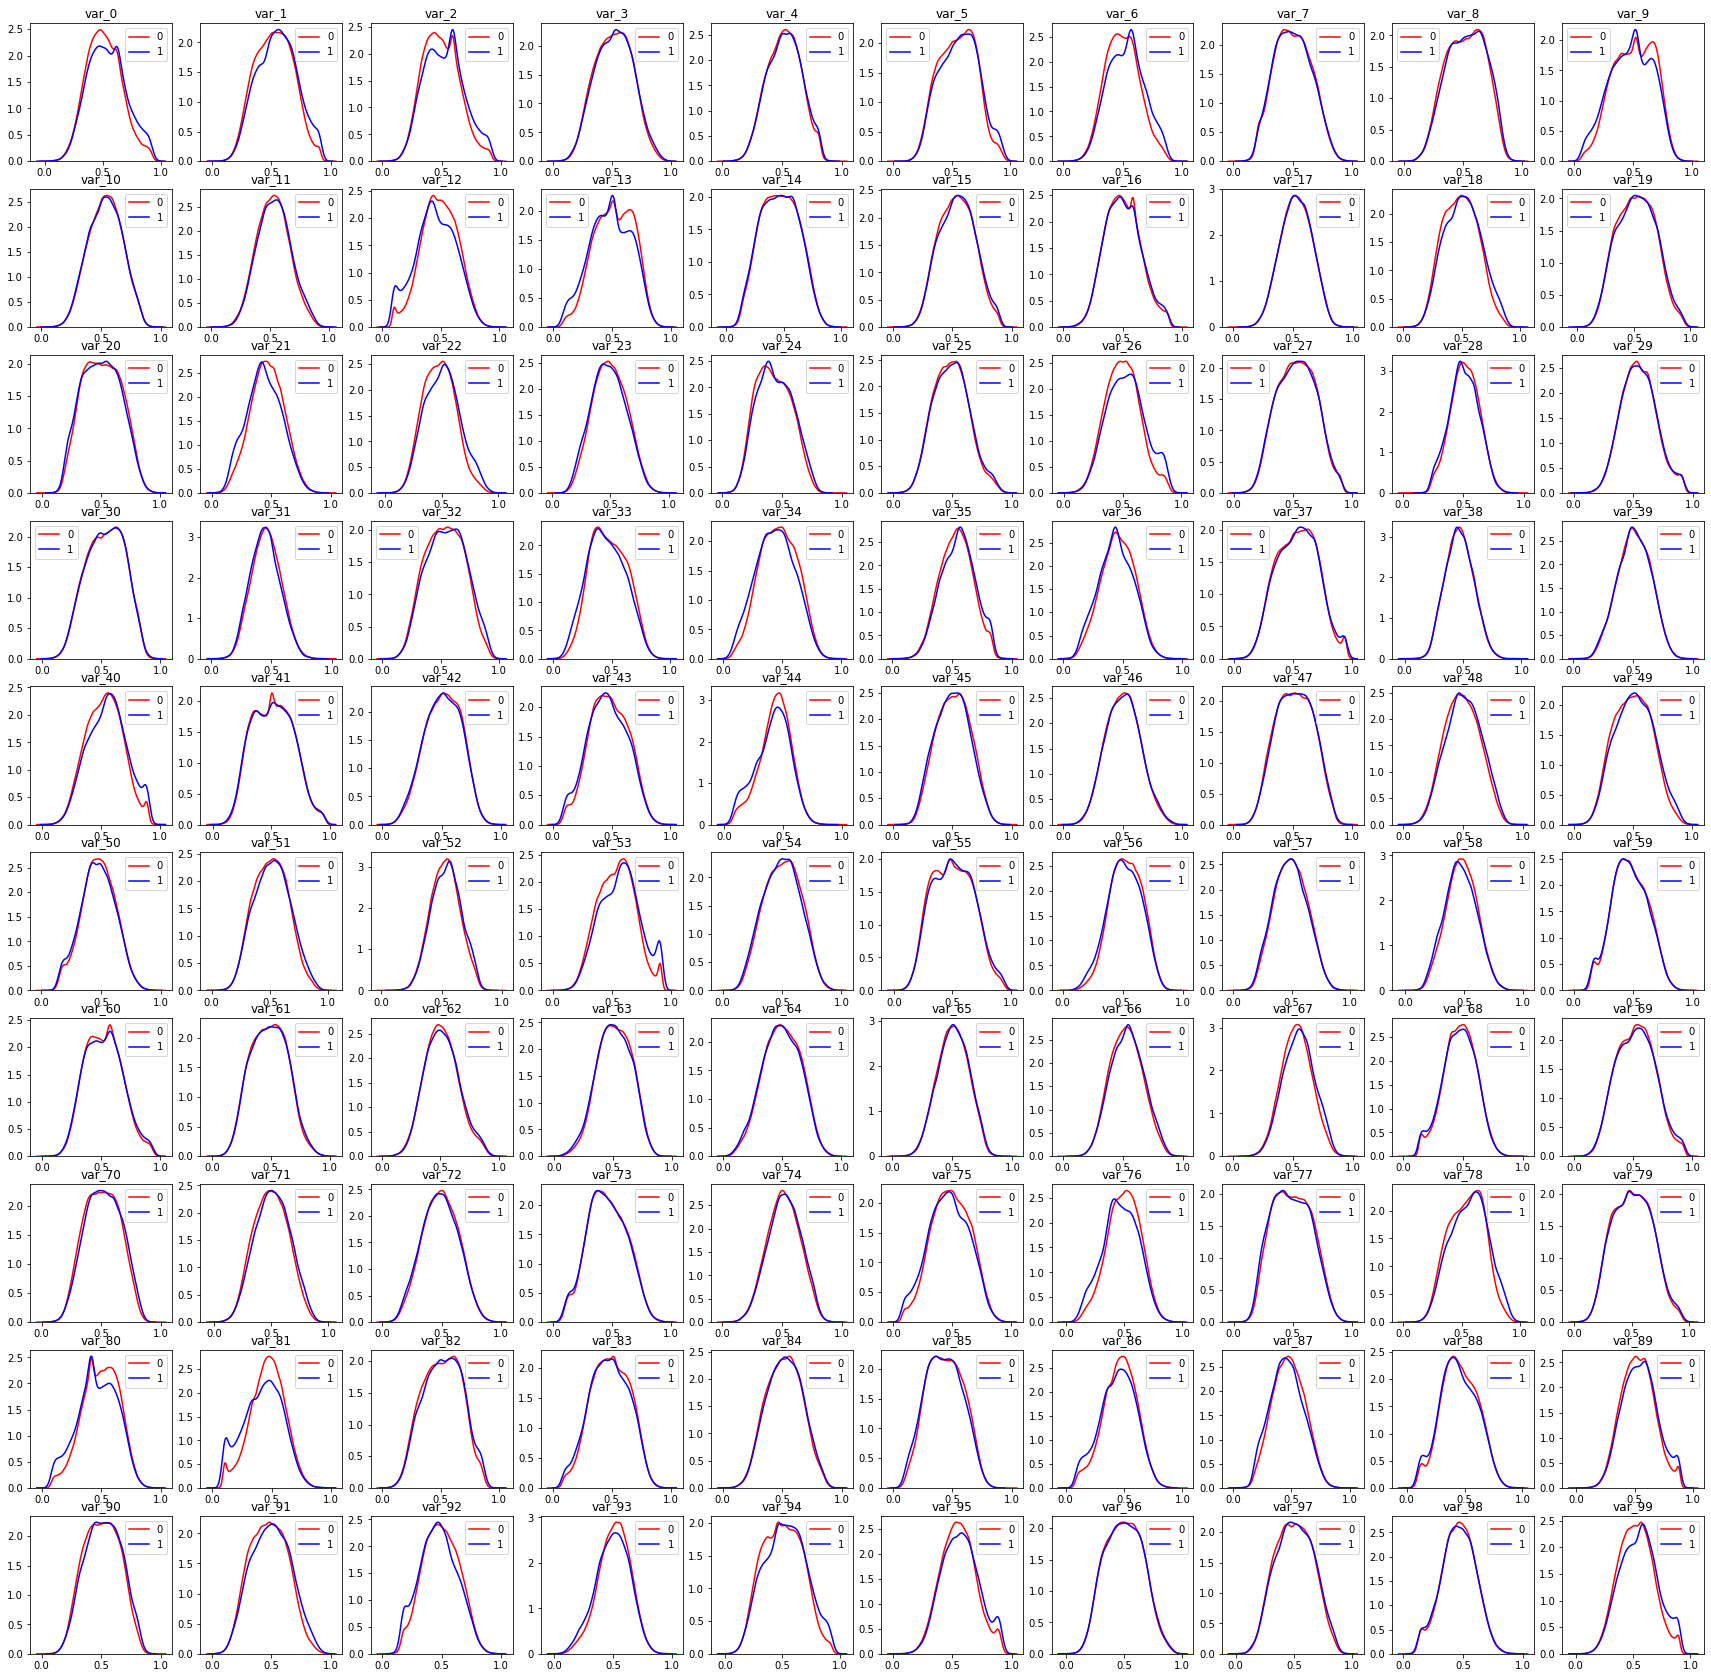

In [16]:
view_dist(df, features[:100])

### Split training data into train and validation sets

In [17]:
random.seed(31415926)
valid_idx = random.sample(list(df.index.values), int(len(df)*0.2))
train_idx = df.drop(valid_idx).index

In [18]:
df.iloc[valid_idx].target.sum() / len(valid_idx), df.target.sum() / len(df)

(0.10125, 0.10049)

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
class roc(Callback):
    """Compute ROC over each batch and return the average over batches"""
    def on_epoch_begin(self, **kwargs):
        self.total = 0
        self.batch_count = 0
        
    def on_batch_end(self, last_output, last_target, **kwargs):
        preds = F.softmax(last_output, dim=1)
        # roc_auc_score does not work on batches lacking both classes
        try:
            roc_score = roc_auc_score(to_np(last_target),
                                      to_np(preds[:,1]))
            self.total += roc_score
            self.batch_count += 1
        except:
            print('problem here')
    def on_epoch_end(self, last_metrics, **kwargs):
        return add_metrics(last_metrics, self.total / self.batch_count)

### FastAI tabular learner
Below is the main train/evaluate function. This is ensemble modeling, meaning multiple learners are trained and evaluated. Thus the models are saved to disk and loaded again when needed

In [21]:
BATCH_SIZE=2048

In [22]:
def train_and_eval_tabular_learner(train_df, train_features,
                                  valid_idx, add_noise=False,
                                  lr=0.02, epochs=1, layers=[200, 50],
                                  ps = [0.5, 0.2], name='learner'):
    data = TabularDataBunch.from_df(path='.', df=train_df, 
                                    dep_var='target', valid_idx=valid_idx,
                                    cat_names=[], 
                                    cont_names=train_features,
                                    bs=BATCH_SIZE, procs=[], 
                                    test_df=test_df)
    learner = tabular_learner(data, layers=layers, ps=ps, metrics=[roc()])
    learner.fit_one_cycle(epochs, lr)
    
    #run prediction on validation set
    valid_predicts, _ = learner.get_preds(ds_type=DatasetType.Valid)
    valid_probs = np.array(valid_predicts[:,1])
    valid_targets = train_df.loc[valid_idx].target.values
    valid_score = roc_auc_score(valid_targets, valid_probs)
    
    #run prediction on test
    test_predicts, _ = learner.get_preds(ds_type=DatasetType.Test)
    test_probs = to_np(test_predicts[:, 1])
    return valid_score, valid_probs, test_probs

In [31]:
sub_features = []
valid_scores = []
valid_predictions = []
predictions = []
num_learner = 5#000
num_epochs = 5
saved_model_prefix='learner'
for i in range(num_learner):
    sub_features.append(random.sample(list(features),
                                       int(num_features*0.5))
                         + stats_features)

    name = f'{saved_model_prefix}_{i}'
    score, valid_probs, test_probs = train_and_eval_tabular_learner(df, 
                                                                   sub_features[-1],
                                                                   valid_idx, 
                                                                   epochs=num_epochs,
                                                                   lr=0.01,
                                                                   name=name)
    valid_scores.append(score)
    valid_predictions.append(valid_probs)
    predictions.append(test_probs)

### Visualize ROC on the Validation Set

In [33]:
for l in sub_features:
    print(len(l))

512
512
512
512
512


In [34]:
# roc_auc_score on validation set
average_valid_predicts = sum(valid_predictions) / len(valid_predictions)

valid_auc_score = roc_auc_score(df.iloc[valid_idx].target, 
                                average_valid_predicts);
valid_auc_score

0.8876605367537217

In [35]:
from sklearn.metrics import roc_curve

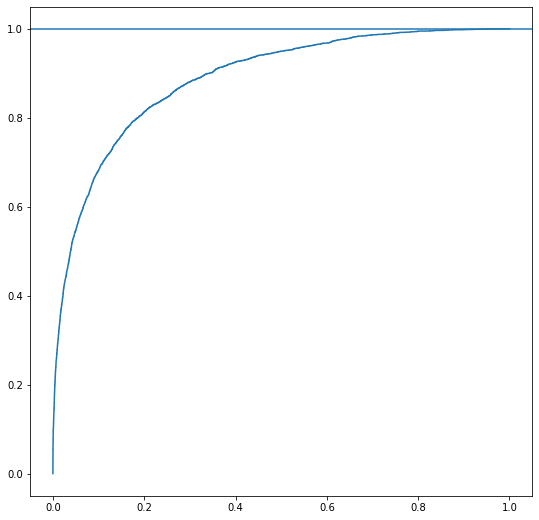

In [36]:
fpr, tpr, _ = roc_curve(y_true=df.iloc[valid_idx].target,
                        y_score=average_valid_predicts)
plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr)
plt.axhline(y=1)
plt.show()

### Test and Submit

In [37]:
test_df['target'] = sum(predictions) / len(valid_predictions)

In [38]:
# add timestamp to submission
from datetime import datetime
now = datetime.now()
model_time = now.strftime('%Y%m%d-%H%M')

In [40]:
test_df[['target']].to_csv(f'submission_fastai_ensemble_{model_time}_{valid_auc_score}.csv')

In [42]:
test_df[['target']]

,target
ID_code,
test_0,0.163283
test_1,0.186748
test_2,0.236847
test_3,0.130833
test_4,0.030952
...,...
test_199995,0.014112
test_199996,0.014800
test_199997,0.002778


In [49]:
df.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [ ]:
df.target.va